# SD212: Graph mining
## Lab 5: PageRank

You will learn how to compute, use and interpret various PageRank metrics of a node in a graph.

You **must** be connected to Telecom ParisTech network!

## Getting started

In [142]:
from connector import Connector
import operator
import heapq

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
base_url = 'http://137.194.192.13:8234'
lab_id = 'lab5'

## To do

* Enter your login and test it using question #0

In [50]:
# Enter your login (last name followed by first letter of first name)
login = 'zhuf'

In [51]:
connector = Connector(base_url, lab_id, login)
get_question = connector.get_question
post_answer = connector.post_answer
post_text = connector.post_text

In [52]:
get_question(0)

Welcome!


## Import

In [53]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [54]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [55]:
import numpy as np

In [56]:
from scipy import sparse as sp

## 1. PageRank

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution uniform over the set of nodes.

## Toy graph

Consider the following graph:

<IPython.core.display.Javascript object>


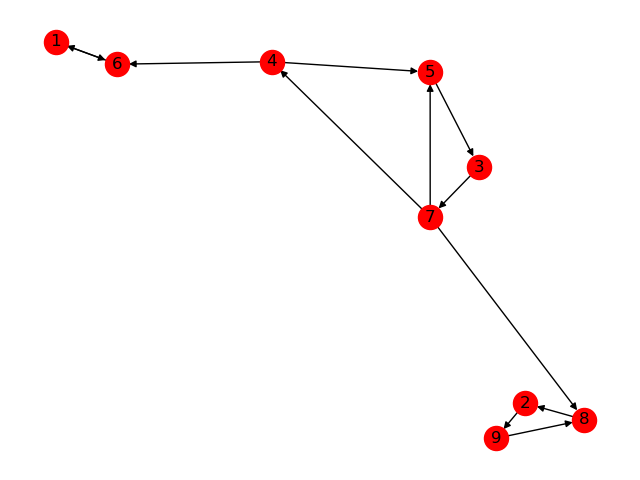

In [57]:
edgelist = [(7,5),(5,3),(3,7),(4,5),(4,6),(7,4),(1,6),(9,8),(7,8),(6,1),(2,9),(8,2)]
G = nx.DiGraph()
G.add_edges_from(edgelist)
figure()
nx.draw(G,with_labels = True)

## To do

* Answer question #1 **(0.5 point)**
* Check the PageRank of each node using the `networkx` function (see below)
* Add edges 2->5 and 6->3 and observe the impact on the top-3 nodes
* Do the same experiment with betweenness centrality
* Answer question #2 **(open answer)**

In [58]:
get_question(1)

What is the best ranked node in this graph?
(Guess and check!)


In [68]:
answer = 6

In [69]:
post_answer(1,answer)

This is correct!


In [75]:
pg_score = nx.pagerank(G, 0.85)
sorted(pg_score.items(), key=operator.itemgetter(1), reverse= True)

[(6, 0.1660380738937397),
 (8, 0.16086300246509883),
 (1, 0.15780138634030672),
 (2, 0.15340048063270742),
 (9, 0.1470581226968908),
 (7, 0.06775849722262378),
 (3, 0.06010803594124311),
 (5, 0.051107493258563),
 (4, 0.03586490754882651)]

In [71]:
PR = nx.pagerank(G)

In [76]:
get_question(2)

Interpret the results.


In [44]:
post_text(2)

Textarea(value='...')

Button(description='Send', style=ButtonStyle())

Answer posted
Answer posted


## Path graph

Now consider a path graph:

<IPython.core.display.Javascript object>


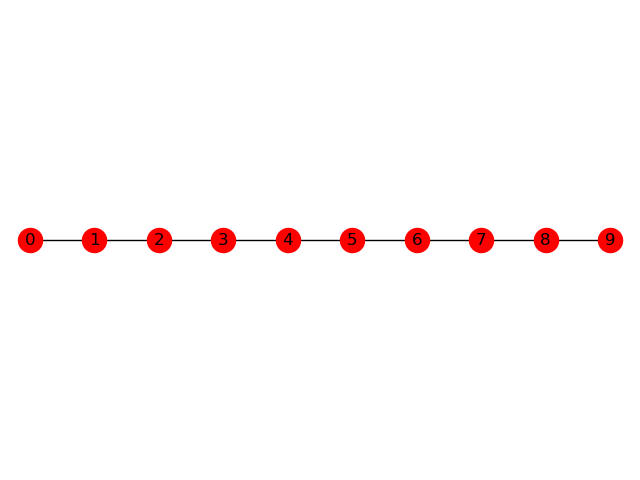

In [79]:
n = 10
G = nx.path_graph(n)
pos = [(i,0) for i in range(n)]
figure()
nx.draw(G,pos,with_labels = True)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$
* Compare with the two most central nodes (in terms of betweenness centrality)
* Answer question #3 **(0.5 point)**

In [78]:
get_question(3)

What is the PageRank vector when alpha tends to 1?
(Enter a list of floats)


In [92]:
x = nx.pagerank(G,1, max_iter=100000)

In [95]:
answer = list(x.values())

In [96]:
post_answer(3,answer)

This is correct!


## Real datasets

We now consider the following real datasets, to be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab5.zip):
* the graph of [Les Misérables](https://fr.wikipedia.org/wiki/Les_Misérables) (co-occurence of characters in chapters of the novel of Victor Hugo),
* the graph of [Wikipedia for Schools](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools) (links between a selection of articles from Wikipedia)
* the bipartite graph of movies-actors links extracted from [YaGo](https://www.mpi-inf.mpg.de/departments/databases-and-information-systems/research/yago-naga/yago/)

## To do

* List the 10 best ranked nodes of Les Misérables
* Compare with the 10 nodes of highest degrees and the 10 nodes of highest weights
* Answer question #4 **(open answer)**

In [134]:
G = nx.read_graphml("miserables.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')

<IPython.core.display.Javascript object>


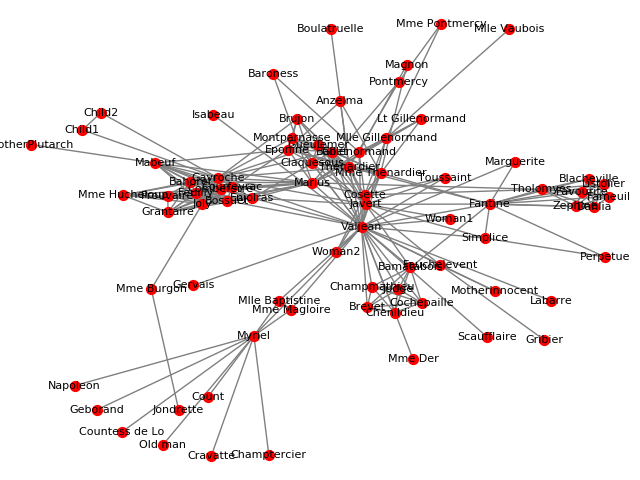

In [135]:
figure()
nx.draw(G, labels = names,font_size = 8,node_size = 50,edge_color = 'gray')

In [100]:
get_question(4)

Try different values of alpha in [0,1] and interpret the results.


In [143]:
dictx = dict()
for x in G.edges(data=True):
    if(x[0] not in dictx):
        dictx[x[0]] = x[2]['weight']
    else:
        dictx[x[0]] += x[2]['weight']
    if(x[1] not in dictx):
        dictx[x[1]] = x[2]['weight']
    else:
        dictx[x[1]] += x[2]['weight']

In [144]:
x = sorted(dictx.items(), key=operator.itemgetter(1), reverse=True)[:10]


[(11, 158),
 (55, 104),
 (58, 91),
 (62, 84),
 (26, 68),
 (59, 68),
 (64, 66),
 (25, 61),
 (48, 56),
 (23, 47)]

In [145]:
sorted(dict(G.degree()).items(), key=operator.itemgetter(1), reverse=True)[:10]

[(11, 36),
 (48, 22),
 (55, 19),
 (27, 17),
 (25, 16),
 (23, 15),
 (58, 15),
 (62, 13),
 (64, 13),
 (63, 12)]

In [156]:
print()
for x in range(0,11):
    A = nx.pagerank(G, alpha = x * 0.1) 
    top10 = heapq.nlargest(10, A, key=A.get) 
    print(x,'\t', top10)
# 
# a = 
# b = 
# c = heapq.nlargest(10, nx.pagerank(G, alpha = 0.5).items(), key=A.get)
# d = heapq.nlargest(10, nx.pagerank(G, alpha = 0.8).items(), key=A.get)
# print(a)
# print(b)
# print(c)
# print(d)



0 	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1 	 [11, 0, 25, 55, 48, 23, 51, 58, 26, 62]
2 	 [11, 0, 55, 25, 48, 23, 51, 58, 26, 62]
3 	 [11, 0, 55, 25, 48, 23, 26, 58, 51, 27]
4 	 [11, 0, 55, 25, 48, 26, 23, 58, 62, 27]
5 	 [11, 0, 55, 25, 26, 48, 23, 58, 62, 27]
6 	 [11, 0, 55, 25, 26, 58, 48, 23, 62, 27]
7 	 [11, 0, 55, 25, 26, 58, 48, 62, 23, 27]
8 	 [11, 55, 0, 26, 25, 58, 62, 48, 23, 27]
9 	 [11, 55, 58, 26, 62, 25, 0, 59, 48, 64]
10 	 [11, 55, 58, 62, 26, 59, 64, 25, 48, 23]


In [290]:
post_text(4)

Textarea(value='...')

Button(description='Send', style=ButtonStyle())

Answer posted


## To do

* List the 10 best ranked nodes of Wikipedia for Schools
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees
* Answer question #5 **(0.5 point)**

In [178]:
G = nx.read_graphml("wikipedia-schools.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')

In [177]:
get_question(5)

Which article of Wikipedia for School is in the top-10 in terms of PageRank but not in the top-10 in terms of in-degree?
(Enter a string)


In [182]:
in_degree = dict(G.in_degree())
top_degree = heapq.nlargest(10, in_degree, in_degree.get)
set_degree = set([names[i] for i in top_degree])

In [185]:
pg = dict(nx.pagerank(G, alpha = 0.85))
pg = heapq.nlargest(10, pg, pg.get)
set_pg = set([names[i] for i in pg])

In [186]:
set_pg - set_degree

{'Latin'}

In [187]:
answer = "Latin"

In [188]:
post_answer(5,answer)

This is correct!


## 2. Sparse matrices

You will now implement your own PageRank algorithm.

Graphs can be efficiently represented by their (weighted) adjacency matrix in sparse format:

In [206]:
A = nx.adjacency_matrix(G)
type(A)

scipy.sparse.csr.csr_matrix

If the nodes are not indexed from 0 to $n-1$, you need to keep a list of nodes:

In [207]:
nodes = list(G.nodes())
n = len(nodes)
nodes == list(range(n))

True

The `scipy` Python package provides very efficient methods for matrix-vector multiplications:

In [208]:
n = shape(A)[0]
x = np.ones(n)
# Out-weights
print(A.dot(x))
# In-weights
print(A.T.dot(x))

[11. 12. 10. ...  2.  4.  6.]
[ 0. 27. 13. ...  0.  0.  0.]


The following function returns the list of non-sink nodes and the (rectangular) transition matrix of the regular random walk from non-sink nodes:

In [209]:
def transition_matrix(G):
    # index: list of non-sink nodes (as numpy array)
    # P: sparse transition matrix of the random walk (from non-sink nodes)
    A = nx.adjacency_matrix(G)
    n = np.shape(A)[0]
    w = A.dot(np.ones(n, float))
    index = np.where(w > 0)[0]
    D = sp.diags(1. / w[index])
    P = D.dot(A[index,:])
    return index, P 

In [210]:
index, P = transition_matrix(G)
shape(P)

(4586, 4591)

In [211]:
n = shape(P)[1]
P.dot(np.ones(n))

array([1., 1., 1., ..., 1., 1., 1.])

In [212]:
# Move from node s
s = 0
x = np.zeros(n)
x[s] = 1
P.T.dot(x[index])

array([0.        , 0.09090909, 0.09090909, ..., 0.        , 0.        ,
       0.        ])

## To do

* Complete the function `transition` below so that it returns the vector $\pi$ after $k$ iterations of the update:
$$
\pi \gets \alpha  P^T \pi + (1-\alpha)\mu,
$$
where $\mu$ is the initial / restart distribution and $P$ is the transition matrix with forced restart in $\mu$ from sink nodes.
* Compare the results (ranking and computation time) of your `pagerank` function to those given by `networkx` functions: `pagerank` and `pagerank_scipy`
* Answer question #6 **(0.5 point)**

In [213]:
def transition(index, P, mu, alpha, k):
    # index: list of non-sink nodes (as numpy array)
    # P: sparse transition matrix of the random walk (from non-sink nodes)
    # mu: initial / restart distribution 
    # alpha: damping factor
    # k: number of iterations
    pi = mu
    for i in range(k): 
        pi = alpha * P.T.dot(pi[index]) + (1-alpha) * mu
    # to be completed
    return pi

In [214]:
def pagerank(G, personalization = None, alpha = 0.85, k = 3):
    # personalization: dictionary for initial / restart distribution (default = uniform)
    # alpha: damping factor
    # k: number of iterations
    n = G.number_of_nodes()
    node_index = {u:i for i,u in enumerate(G.nodes())}
    if personalization == None:
        mu = np.ones(n,float) / n
    else:
        mu = np.zeros(n,float)
        for u in personalization:
            mu[node_index[u]] = personalization[u]
    index, P = transition_matrix(G)
    pi = transition(index, P, mu, alpha, k)
    PR = {u: pi[node_index[u]] for u in G.nodes()}
    return PR

In [215]:
get_question(6)

What is the PageRank of the article Japan after k = 2 iterations for alpha = 1?
(Enter a float)


In [236]:
pg_list= pagerank(G, k=3, alpha=1)[285]

In [237]:
pg_list

0.004473267676873789

In [238]:
for x in G.nodes(data = True):
    if(x[1]['name'] == 'Japan'):
        print(x)

(285, {'name': 'Japan'})


In [240]:
post_answer(6,0.004473267676873789)

This is correct!


## 3. Personalized PageRank

Unless otherwise specified, we take the default values $\alpha = 0.85$ and $k = 3$.

## To do

* Answer questions #7 and #8 **(0.5 point each)**

In [241]:
get_question(7)

What is the best ranked painter relative to Pablo Picasso (other than him) in terms of Personalized PageRank?
(Enter a string)


In [255]:
nx.pagerank(G,alpha=0.85)
dict(G.neighbors(1185)

TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [265]:
answer = "Henri_Matisse"

In [275]:
G.nodes(data=True)

NodeDataView({0: {'name': 'Aedan_mac_Gabrain'}, 1: {'name': 'Bede'}, 2: {'name': 'Columba'}, 3: {'name': 'Dal_Riata'}, 4: {'name': 'Great_Britain'}, 5: {'name': 'Ireland'}, 6: {'name': 'Isle_of_Man'}, 7: {'name': 'Monarchy'}, 8: {'name': 'Orkney'}, 9: {'name': 'Picts'}, 10: {'name': 'Scotland'}, 11: {'name': 'Wales'}, 12: {'name': 'Aland'}, 13: {'name': '20th_century'}, 14: {'name': 'Baltic_Sea'}, 15: {'name': 'Crimean_War'}, 16: {'name': 'Currency'}, 17: {'name': 'Euro'}, 18: {'name': 'European_Union'}, 19: {'name': 'Finland'}, 20: {'name': 'League_of_Nations'}, 21: {'name': 'List_of_countries_by_system_of_government'}, 22: {'name': 'Nationality'}, 23: {'name': 'Parliamentary_system'}, 24: {'name': 'Police'}, 25: {'name': 'Russia'}, 26: {'name': 'Stockholm'}, 27: {'name': 'Sweden'}, 28: {'name': 'Time_zone'}, 29: {'name': 'Tourism'}, 30: {'name': 'United_Kingdom'}, 31: {'name': 'World_War_II'}, 32: {'name': 'Edouard_Manet'}, 33: {'name': 'Absinthe'}, 34: {'name': 'Beer'}, 35: {'name':

In [266]:
post_answer(7,answer)

This is correct!


In [258]:
get_question(8)

What is the best article of Wikipedia for Schools relative to Nairobi, Oslo and Tokyo (other than these) in terms of Personalized PageRank for alpha = 0.2?
(Enter a string)


In [272]:
for x in G.nodes(data = True):
    if(x[1]['name'] == 'Nairobi'):
      print(x)
    if(x[1]['name'] == 'Oslo'):
      print(x)
    if(x[1]['name'] == 'Tokyo'):
      print(x)


(699, {'name': 'Tokyo'})
(1485, {'name': 'Nairobi'})
(2534, {'name': 'Oslo'})


In [274]:
ne1 = set(G.neighbors(699))
ne2 = set(G.neighbors(1485))
ne3 = set(G.neighbors(2534))


In [277]:
post_answer(8,'Football_(soccer)')

This is correct!


## 4. Forward-Backward PageRank

## To do
* Complete the functions below to get the (Personalized) Forward-Backward PageRank vector
* Answer question #9 and #10 **(1 point each)**

In [ ]:
def forward_backward_transition(index, P, index_, P_, mu, alpha, k):
    # index: list of non-sink nodes (as numpy array)
    # P: sparse transition matrix of the forward random walk (from non-sink nodes)
    # index_: list of non-source nodes (as numpy array)
    # P_: sparse transition matrix of the backward random walk (from non-source nodes)
    # mu: initial / restart distribution (default = uniform)
    # alpha: damping factor
    # k: number of iterations
    pi = mu
    # to be completed
    return pi

In [ ]:
def forward_backward_pagerank(G, personalization = None, alpha = 0.85, k = 3):
    # personalization: dictionary for initial / restart distribution (default = uniform)
    # alpha: damping factor
    # k: number of iterations
    PR = {u: 0. for u in G.nodes()}
    # to be completed
    return PR

In [267]:
get_question(9)

What is the best ranked article relative to Pablo Picasso (other than him) in terms of Personalized Forward-Backward PageRank?
(Enter a string)


In [280]:
list(G.neighbors(1185))
nodes = nodes

[232,
 1843,
 1162,
 757,
 760,
 38,
 40,
 3183,
 821,
 2107,
 46,
 2833,
 121,
 2130,
 98,
 50,
 602,
 31]

In [288]:
answer = "History_of_painting"

In [289]:
post_answer(9,answer)

This is correct!


In [ ]:
G = nx.read_graphml("movies-actors.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')

In [281]:
get_question(10)

What is the best ranked actor relative to Tom Hanks (other than him) in the movies-actors graph in terms of Personalized Backward-Forward PageRank?
(Enter a string)


In [286]:
answer = "Tim Allen"

In [287]:
post_answer(10,answer)

This is correct!
